# Project: No show appoinments data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.<br>
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment. <br>
● ‘Neighborhood’ indicates the
location of the hospital. <br>
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família. <br><br>
<b> Our Questions: </b>
1. What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?
2. Comparison between the impact that happens as a result for the age and the received SMS
  * What is the impact on the attendance rate when changing ages?
  * What is the impact on the attendance rate when changing the number of received SMS?
3. How can we see the difference between Alcoholism and Diabetes?

<a id='wrangling'></a>
## Data Wrangling
>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [2]:
#importing packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline
%config inlinebackend.figure_format = 'svg'

#importing dataset

df = pd.read_csv('visitdata.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# lets get the number of rowns and columns in the dataset
df.shape

(110527, 14)

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Great! looks like we have no missing values in our dataset. 

### Data Cleaning 
> In the next few cells we will be exploring the data and cleaning it by dropping the miising data and duplicates
After discussing the structure of the data and any problems that need to be cleaned, I will perform those cleaning steps in the second part of this section.

This dataset has no messing values so, it will be great if a Machine learning module has been trained on this dataset

In [28]:
# removing duplicates
df.drop_duplicates(inplace = True)
df.shape

(109892, 12)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109892 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          109892 non-null  object
 1   ScheduledDay    109892 non-null  object
 2   AppointmentDay  109892 non-null  object
 3   Age             109892 non-null  int64 
 4   Neighbourhood   109892 non-null  object
 5   Scholarship     109892 non-null  int64 
 6   Hipertension    109892 non-null  int64 
 7   Diabetes        109892 non-null  int64 
 8   Alcoholism      109892 non-null  int64 
 9   Handcap         109892 non-null  int64 
 10  SMS_received    109892 non-null  int64 
 11  No-show         109892 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.9+ MB


In [31]:
# counting duplicates after the cleaning
df.duplicated().sum()

0

In [42]:
# showing the dataset after cleaning
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [46]:
df.set_index('No-show', inplace=True)
df.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,,,,,,
No,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0
No,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0
No,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0
No,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0
No,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0
No,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0
Yes,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0
Yes,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0
No,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0


#### Great! we kinda finished cleaning our dataset.

<a id='eda'></a>
## Exploratory Data Analysis

> Now that I've trimmed and cleaned the data, I'm ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with the approach.

###  What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [48]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,,,,,,
No,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0
No,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0
No,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0
No,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0
No,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0


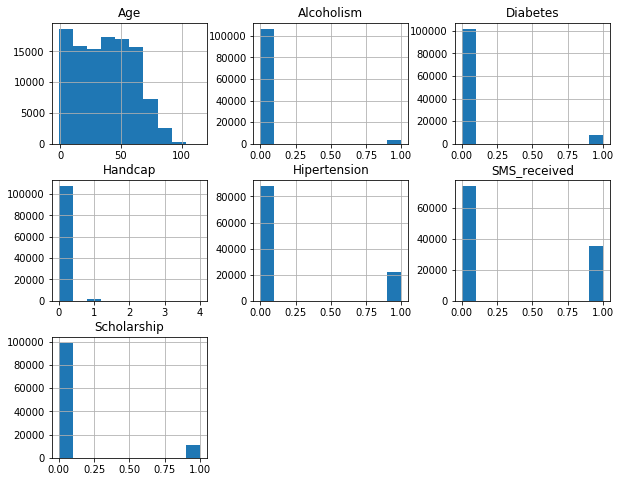

In [47]:
df.hist(figsize=(10,8));

I think the factors the must be taken in consideration is the age and the neighbourhood

### Comparison between the impact that happens as a result for the age and the received SMS
* What is the impact on the attendance rate when changing ages?
* What is the impact on the attendance rate when changing the number of received SMS?

In [49]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,,,,,,
No,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0
No,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0
No,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0
No,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0
No,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0


In [61]:
'''
def moving_average1(column):
    window_size = 5
    Age = pd.Series(df[column])
    windows = Age.rolling(window_size)
    moving_averages = windows.mean()
    moving_averages_list = moving_averages.tolist()
    
def moving_average2(column2):
    window_size = 5
    Age = pd.Series(df['column2'])
    windows = Age.rolling(window_size)
    moving_averages = windows.mean()
    moving_averages_list = moving_averages.tolist()
'''

"\ndef moving_average1(column):\n    window_size = 5\n    Age = pd.Series(df[column])\n    windows = Age.rolling(window_size)\n    moving_averages = windows.mean()\n    moving_averages_list = moving_averages.tolist()\n    \ndef moving_average2(column2):\n    window_size = 5\n    Age = pd.Series(df['column2'])\n    windows = Age.rolling(window_size)\n    moving_averages = windows.mean()\n    moving_averages_list = moving_averages.tolist()\n"

In [68]:
window_size = 20
Age = pd.Series(df['Age'])
windows = Age.rolling(window_size)
moving_averages = windows.mean()
moving_averages_list = moving_averages.tolist()

In [75]:
SMS_received = pd.Series(df['SMS_received'])
windows2 = SMS_received.rolling(window_size)
moving_averages2 = windows2.mean()
moving_averages_list2 = moving_averages2.tolist()

Text(0, 0.5, 'Ages')

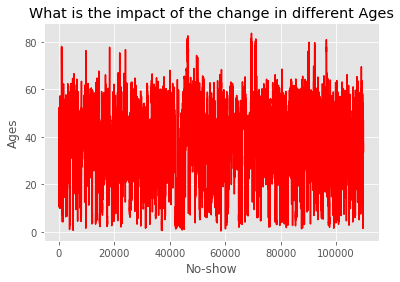

In [80]:
plt.style.use('ggplot')
plt.plot(moving_averages_list, 'r')
plt.title('What is the impact of the change in different Ages')
plt.xlabel('No-show')
plt.ylabel('Ages')

Text(0, 0.5, 'Received SMS')

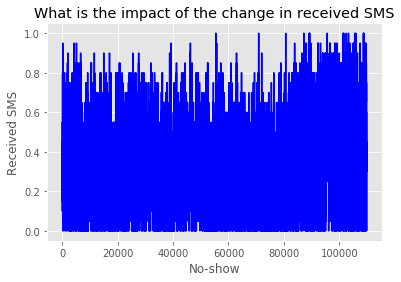

In [76]:
plt.style.use('ggplot')
plt.plot(moving_averages_list2, 'b')
plt.title('What is the impact of the change in received SMS')
plt.xlabel('No-show')
plt.ylabel('Received SMS')

### How can we see the difference between Alcoholism and Diabetes?

(          Alcoholism       Diabetes
 count  109892.000000  109892.000000
 mean        0.030430       0.071825
 std         0.171768       0.258199
 min         0.000000       0.000000
 25%         0.000000       0.000000
 50%         0.000000       0.000000
 75%         0.000000       0.000000
 max         1.000000       1.000000,)

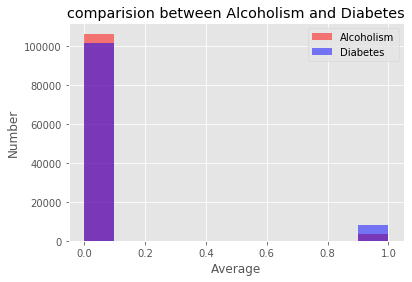

In [84]:
df['Alcoholism'].hist(alpha = 0.5, label = 'Alcoholism', color = "red", lw=0)
df['Diabetes'].hist(alpha=0.5, label = 'Diabetes', color = "blue", lw=0)
plt.legend()
plt.title('comparision between Alcoholism and Diabetes')
plt.xlabel('Average')
plt.ylabel('Number')
pd.DataFrame(df[['Alcoholism', 'Diabetes']].describe()),

The shown above data compares between the `Alcoholism` and the `Diabetes`

<a id='conclusions'></a>
## Conclusions

> * I cleaned the data, dropeed the missing values so the data was ready to get analysed
* After exploring the data it became clear to minds and I had some quiestions that I needed to answer.
* I used the data to anser these quiestions and then here we go! It's ready to be shared.

I have decided to discuss these particular questions in order to approach the maximum possible degree of comprehension for the reader to be able to deal with these dataset if he needed to.
Some questions are a comparison of some parts of this data so that the reader can clearly differentiate between them.
Other parts are a clear graphic representation of some columns of the data as well.

In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0